In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy.lib.function_base import diff
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

import os
from google.colab import drive
from statsmodels.stats.outliers_influence import variance_inflation_factor
drive.mount('/content/drive', force_remount=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
# load csv correctly into a DataFrame and show contents in a cell
root_path = r'/content/drive/MyDrive/final.csv/'
df = pd.read_csv(os.path.join(root_path, 'For_modeling.csv'))
# df = pd.read_csv('/Users/chen.wei/Downloads/For_modeling.csv')
df

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601134,9830306,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,...,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,9830307,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,...,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,...,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,...,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


It is essential for large amounts of available data to be organized for analysis. Now we need to perform some data wrangling steps in order to transform the raw data for easy access and analysis

In [ ]:
# after checking the data,delete the 'Unnamed' cloumn
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601134,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,23,...,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,23,...,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,22,...,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,23,...,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [ ]:
# show some basic information of each column to help analyze each column
show = df.describe()
show

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


get a copy of df and load gc library, use del and collect() mothod to to force the system to try to reclaim the maximum amount of available memory. 

In [ ]:
import gc
X = df.copy()
del df
df = X
gc.collect()

61

handle the missing data and use SimoleImputer to fill in the missing data with median

In [ ]:
df.isnull().sum()
colNames = df.columns
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
for i in range(0,len(colNames),5):
    col = colNames[i: i + 5 ]
    print(col)
    transform_data = df[col]
    df[col] = imputer.fit_transform(transform_data.values)

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong'], dtype='object')
Index(['DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour'], dtype='object')
Index(['Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour'], dtype='object')
Index(['Dmin', 'DDweek', 'Temp', 'Precip', 'Wind'], dtype='object')
Index(['Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'], dtype='object')


 then we have handled all the missing data

In [ ]:
df.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

Since the whole dataset is so large, we need to select part of the data while ensuring that the training time is not too long, we try to use the most resently data from last 1000000 rows because we find that the only recent data has value of 'snow' and 'precip'feature. so we can make sure the data is big enough to train and test and also make sure the timeliness of data

In [ ]:
df = df[8600000:9600000]

Since we want to predict the duration of the using bikes, we certainly should use Supervised learning and set the 'Duration' as target array.

In [ ]:
target = 'Duration'
X = df.drop(columns=[target])
y = df[[target]]

Next, we use MinMaxScaler to transform features by scaling each feature to a given range. Here we use the default range(0,1)

In [ ]:
X_scale = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
y_scale = MinMaxScaler(feature_range=(0, 1)).fit_transform(y)

In [ ]:
X_scale

array([[0.04172549, 0.43975219, 0.69036178, ..., 0.        , 0.89189189,
        0.31216931],
       [0.12373457, 0.55621135, 0.60894285, ..., 0.        , 0.89189189,
        0.31216931],
       [0.26462195, 0.51772437, 0.65054183, ..., 0.        , 0.89189189,
        0.31216931],
       ...,
       [0.01919553, 0.47042769, 0.73373979, ..., 0.        , 0.18318318,
        0.16402116],
       [0.4199285 , 0.38846658, 0.27531782, ..., 0.        , 0.21621622,
        0.15343915],
       [0.06215266, 0.51950691, 0.26418248, ..., 0.        , 0.18318318,
        0.16402116]])

In [ ]:
y_scale

array([[0.44915254],
       [0.1779661 ],
       [0.33050847],
       ...,
       [0.00847458],
       [0.46610169],
       [0.15254237]])

Now we can start to split arrays into random train,test and hold-out subsets which the ratio is 8:1:1 using train_spilt_test method. we use train set and test set to calculate the train score and test score. through the scores we can find the suitalble parameter. Then we hold back some subset of the data and use these to check the performance of the model.

In [ ]:
X_train1, X_test1, y_train, y_test = train_test_split(X_scale,y_scale,test_size=0.2, random_state=1)
X_test1, X_hold_out, y_test, y_hold_out= train_test_split(X_test1,y_test,test_size=0.5, random_state=1)
print(X_train1.shape)
print(X_test1.shape)
print(X_hold_out.shape)

(800000, 24)
(100000, 24)
(100000, 24)


Next we want to anzlyze the relationship among features and try to select the most important features and delete the features which have little effect on the rsults.

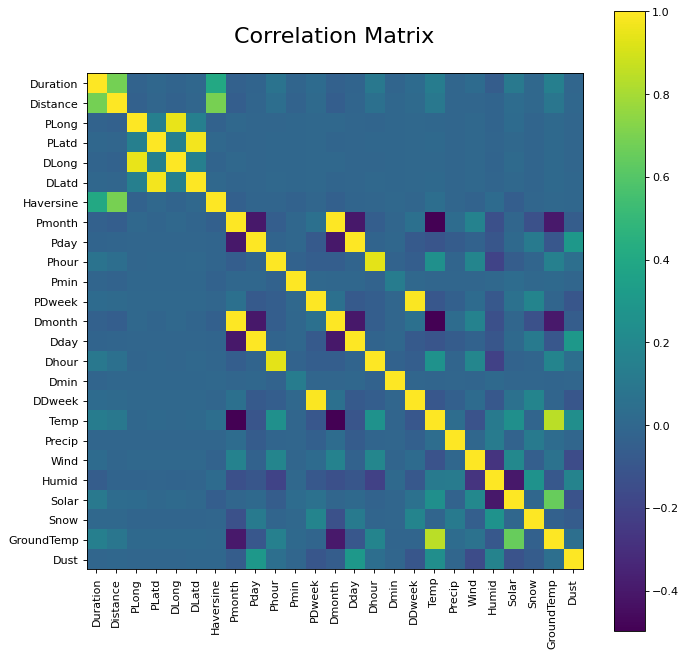

In [ ]:
# we use Correlation matrix and color bar to see the correlation coefficients between variables, 
# The closer the value is to 1, the stronger their correlation
def showCorrelationMatrix(df, graphWidth):
    # keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
   
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=20)
    plt.show()
showCorrelationMatrix(df, 10)

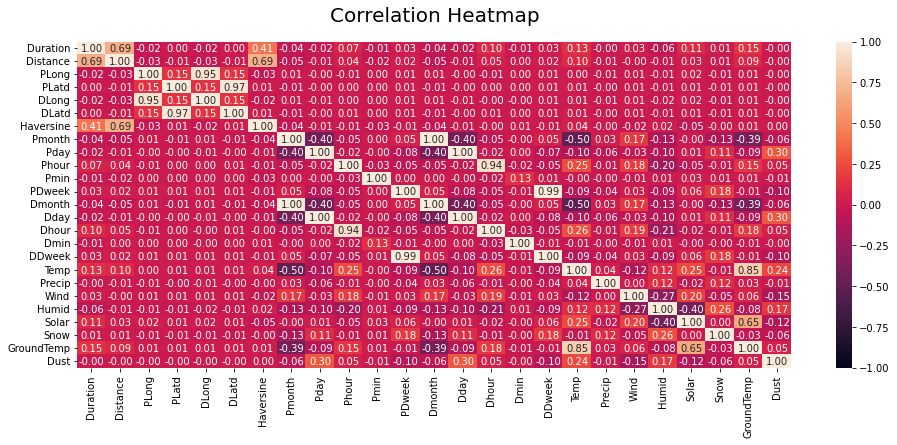

In [ ]:
# We also use Correlation Heatmap to see the specific number of each feature's correlation.
plt.figure(figsize=(16, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, 
# and set the annotation to True and show two digits to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,fmt=".2f")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20);

We can see that Pmonth and Dmonth,Pday and Dday, Phour and Dhour, PDweek and DDweek, Temp and Ground Temp have high correlation, so one way is to delete one of each pair.But we need to futhur analyze.

Then we calculate VIF score to see how well the variable is explained by other independent variables. So, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
for i in vif_data.values:
    print(i)

['Duration' 26.137546235534558]
['Distance' 5.569979344022404]
['PLong' 6747402.106325129]
['PLatd' 44100765.2370636]
['DLong' 6779418.076959716]
['DLatd' 44061433.58899647]
['Haversine' 3.8992322422026313]
['Pmonth' 6715856478.112617]
['Pday' 21618027.284671005]
['Phour' 22085.267831449593]
['Pmin' 35.263674802237226]
['PDweek' 228.09356228546932]
['Dmonth' 6716136904.710805]
['Dday' 21622297.43852738]
['Dhour' 22493.394660063786]
['Dmin' 37.032560138541996]
['DDweek' 228.17959652299743]
['Temp' 17.07072852417942]
['Precip' 1.0409583926412487]
['Wind' 4.958139234444947]
['Humid' 14.055321656273046]
['Solar' 7.831415026225945]
['Snow' 1.3194854547541093]
['GroundTemp' 23.34791200705655]
['Dust' 7.883566040714858]


we can see that PLong,PLatd,DLong,DLate,Pmonth,Pday,Dday,Phour,Dour has very high VIF score, it makes sense since these parameters are truly related,so that these features are focus parameters that we choose to delete.

Then we use SelectKBest method to select all features according to the k highest scores(score_func choose f_regression since we want F-value between label/feature for regression tasks)

In [ ]:
select = SelectKBest(score_func=f_regression, k='all')
fit = select.fit(X_train1, y_train.ravel())
print(fit.scores_)

[7.07340378e+05 4.65403853e+02 8.66539392e-01 2.42128033e+02
 2.50663276e+00 1.57873272e+05 1.09050462e+03 2.59706235e+02
 4.20927692e+03 1.00992686e+02 5.52073395e+02 1.06354694e+03
 2.60023762e+02 8.18398866e+03 4.92085132e+01 5.71270080e+02
 1.35791729e+04 6.94155293e+00 5.11505320e+02 2.54280689e+03
 9.28686581e+03 6.90449996e+01 1.76966108e+04 1.06043617e+01]


we add the feature name to the score

In [ ]:
for i in range(len(fit.scores_)):
    print('Feature %s: %f' % (df.columns.values[i+1], fit.scores_[i]))

Feature Distance: 707340.377644
Feature PLong: 465.403853
Feature PLatd: 0.866539
Feature DLong: 242.128033
Feature DLatd: 2.506633
Feature Haversine: 157873.271810
Feature Pmonth: 1090.504617
Feature Pday: 259.706235
Feature Phour: 4209.276918
Feature Pmin: 100.992686
Feature PDweek: 552.073395
Feature Dmonth: 1063.546942
Feature Dday: 260.023762
Feature Dhour: 8183.988657
Feature Dmin: 49.208513
Feature DDweek: 571.270080
Feature Temp: 13579.172854
Feature Precip: 6.941553
Feature Wind: 511.505320
Feature Humid: 2542.806889
Feature Solar: 9286.865805
Feature Snow: 69.045000
Feature GroundTemp: 17696.610770
Feature Dust: 10.604362


then we put the feature and score in a list

In [ ]:
featureScore = {}
for i in range(len(fit.scores_)):
    featureScore[df.columns.values[i+1]] = fit.scores_[i]
featureScore

{'DDweek': 571.270079684757,
 'DLatd': 2.50663276065526,
 'DLong': 242.12803308067242,
 'Dday': 260.0237624255945,
 'Dhour': 8183.988656845201,
 'Distance': 707340.3776438342,
 'Dmin': 49.20851316531877,
 'Dmonth': 1063.546941509323,
 'Dust': 10.604361712624325,
 'GroundTemp': 17696.61076993648,
 'Haversine': 157873.27180976985,
 'Humid': 2542.806889124229,
 'PDweek': 552.0733954345101,
 'PLatd': 0.8665393924835672,
 'PLong': 465.4038529490915,
 'Pday': 259.7062348462148,
 'Phour': 4209.276918102264,
 'Pmin': 100.99268556503637,
 'Pmonth': 1090.5046169268128,
 'Precip': 6.941552925431969,
 'Snow': 69.04499955415997,
 'Solar': 9286.865805102423,
 'Temp': 13579.17285352689,
 'Wind': 511.5053195110262}

we know that with higher score,the feature has more effect on the result, so we set can set a value(1500) and find features that below this value

In [ ]:
featureName = []
featureIndex = []
index = -1
for i,j in featureScore.items():
    index = index + 1
    if(j < 1500):
        featureName.append(i)
        featureIndex.append(index)
print(featureName)


['PLong', 'PLatd', 'DLong', 'DLatd', 'Pmonth', 'Pday', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dmin', 'DDweek', 'Precip', 'Wind', 'Snow', 'Dust']


now we can see that from SelectKBest we get an array['PLong', 'PLatd', 'DLong', 'DLatd', 'Pmonth', 'Pday', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dmin', 'DDweek', 'Precip', 'Wind', 'Snow', 'Dust'] which means the least important features, from VIF score,we find PLong,PLatd,DLong,DLate,Pmonth,Pday,Dday,Phour,Dour has very high VIF score, so combine these two results, we can do the feature selection that we can delete 'PLong', 'PLatd', 'DLong', 'DLatd', 'Pmonth','Dmonth','Pday','Dday'these features to make sure our prediction is reasonable through our data.

So we drop these columns from the df.

In [ ]:
delCol=['PLong', 'PLatd', 'DLong', 'DLatd', 'Pmonth','Dmonth','Pday','Dday']
delIndex=[1,2,3,4,6,11,7,12]
df = df.drop(delCol,axis = 1)
print(df.shape)

(1000000, 17)


In [ ]:
df

,Duration,Distance,Haversine,Phour,Pmin,PDweek,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
8600000,54.0,1390.0,0.000000,12.0,9.0,1.0,13.0,5.0,1.0,12.8,0.0,1.8,45.0,1.82,0.0,19.5,66.0
8600001,22.0,4120.0,3.068780,12.0,42.0,1.0,13.0,5.0,1.0,12.8,0.0,1.8,45.0,1.82,0.0,19.5,66.0
8600002,40.0,8810.0,4.396088,12.0,25.0,1.0,13.0,5.0,1.0,12.8,0.0,1.8,45.0,1.82,0.0,19.5,66.0
8600003,3.0,800.0,0.628737,13.0,1.0,1.0,13.0,5.0,1.0,13.5,0.0,2.2,43.0,1.92,0.0,21.1,48.0
8600004,4.0,1040.0,0.731069,13.0,1.0,1.0,13.0,5.0,1.0,13.5,0.0,2.2,43.0,1.92,0.0,21.1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599995,12.0,1770.0,1.379050,21.0,24.0,0.0,21.0,36.0,0.0,-4.6,0.0,1.1,44.0,0.00,0.0,-4.1,38.0
9599996,12.0,3020.0,1.802728,21.0,23.0,0.0,21.0,36.0,0.0,-4.6,0.0,1.1,44.0,0.00,0.0,-4.1,38.0
9599997,2.0,640.0,0.561306,21.0,33.0,0.0,21.0,37.0,0.0,-4.6,0.0,1.1,44.0,0.00,0.0,-4.1,38.0
9599998,56.0,13980.0,1.983663,20.0,40.0,0.0,21.0,37.0,0.0,-3.7,0.0,0.8,39.0,0.00,0.0,-3.0,36.0


In [ ]:
print(df.columns)

Index(['Duration', 'Distance', 'Haversine', 'Phour', 'Pmin', 'PDweek', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')


we also have to use index to delete the columns from the train set, test set and hold_out set.

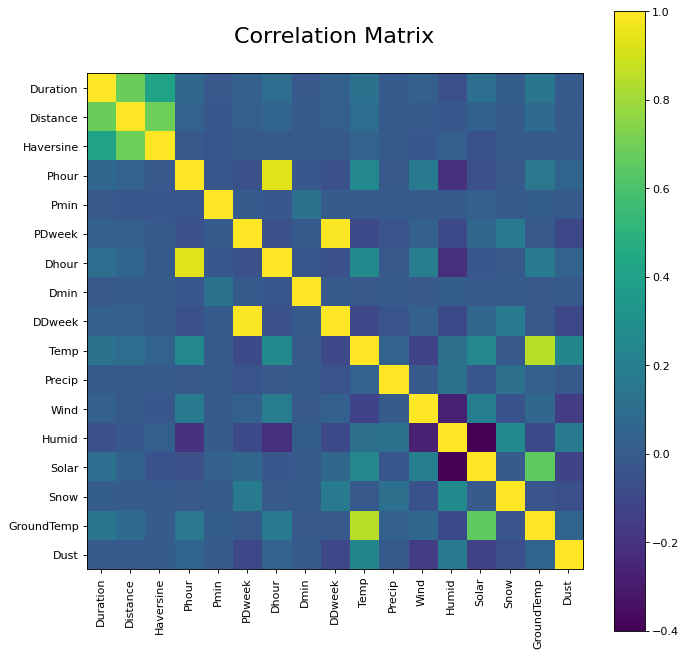

In [ ]:
# we use Correlation matrix and color bar to see the correlation coefficients between variables, 
# The closer the value is to 1, the stronger their correlation
def showCorrelationMatrix(df, graphWidth):
    # keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
   
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=20)
    plt.show()
showCorrelationMatrix(df, 10)

In [ ]:
delIndex=[1,2,3,4,6,11,7,12]
X_train = np.delete(X_train1,delIndex,1)
X_test = np.delete(X_test1,delIndex,1)
X_hold_out = np.delete(X_hold_out,delIndex,1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_hold_out.shape)
print(y_train.shape)
print(y_test.shape)

(800000, 16)
(100000, 16)
(100000, 16)
(800000, 1)
(100000, 1)


now we can calculate VIF from the rest df and we can find that there are't very high VIF score

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
for i in vif_data.values:
    print(i)

['Duration' 3.629908288667975]
['Distance' 5.5663248651800155]
['Haversine' 3.838217722147761]
['Phour' 47.013043486504266]
['Pmin' 3.736881522573579]
['PDweek' 226.79867948874062]
['Dhour' 46.673296419351416]
['Dmin' 3.868234752674098]
['DDweek' 226.95420008821785]
['Temp' 15.943804466848388]
['Precip' 1.031994674913963]
['Wind' 4.426200655219697]
['Humid' 7.017790745121165]
['Solar' 6.163486838561053]
['Snow' 1.170556930482631]
['GroundTemp' 21.57819920474257]
['Dust' 5.722223258327316]


Now we have precessed data and we choose some regression models to train and test.

first we use Linear Regression model with all default parameters and get train and test score

In [ ]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))
print(lm.score(X_hold_out,y_hold_out))

0.4898845059312015
0.015833800431147568
0.1258324299659971
0.06968270153208275
0.4899509414849652
0.4898845059312015
0.49186645443359245


throuth the scores of Linear Regression, we find that it didn't perform as we imaged, but two scores are close which means it didn't overfit.we think maybe we should add more randomness to the data, so we add cross validation to spilt the train set and calculate the score.

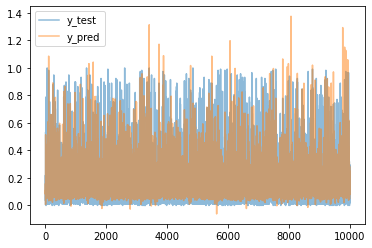

In [ ]:
y_test1 = y_test.reshape(1,100000)[0]
y_pred1 = y_pred.reshape(1,100000)[0]
comparisonLGB = pd.DataFrame({'y_test':y_test1[:10000], 'y_pred':y_pred1[:10000]})
comparisonLGB.plot(alpha=0.5)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)
index = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{index}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    index += 1

Fold:1, Train set: 640000, Test set:160000
Fold:2, Train set: 640000, Test set:160000
Fold:3, Train set: 640000, Test set:160000
Fold:4, Train set: 640000, Test set:160000
Fold:5, Train set: 640000, Test set:160000


In [ ]:
score_r2 = cross_val_score(lm, X_train, y_train, cv= kf,scoring='r2')
score_mse = cross_val_score(lm, X_train, y_train, cv= kf,scoring='neg_mean_squared_error')
score_mae = cross_val_score(lm, X_train, y_train, cv= kf,scoring='neg_mean_absolute_error')
print(f'r2 Scores for each fold: {score_r2}')
print(score_r2.mean())
print(f'mse Scores for each fold: {score_mse}')
print(abs(score_mse.mean()))
print(f'mae Scores for each fold: {score_mae}')
print(abs(score_mae.mean()))

r2 Scores for each fold: [0.48683125 0.48678299 0.49140763 0.49247693 0.4919845 ]
0.4898966601477007
mse Scores for each fold: [-0.0155277  -0.01566112 -0.0154003  -0.01541701 -0.01553158]
0.01550754249298546
mae Scores for each fold: [-0.06918958 -0.06929205 -0.0689983  -0.06938335 -0.06939687]
0.06925202961015389


we can see that such scores don't have significant difference from the previous scores. so we can see the randomness of the data is good, we don't need to add cross validation to model.

Second, we use Ridge regression, Ridge Regression is an extension of linear regression that adds a regularization penalty to the loss function during training.

In [ ]:
# Ridge Regression
ridgeModel = linear_model.RidgeCV()
ridgeModel.fit(X_train, y_train)
y_pred = ridgeModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(ridgeModel.score(X_train,y_train))
print(ridgeModel.score(X_test,y_test))
print(ridgeModel.score(X_hold_out,y_hold_out))

0.489883602299092
0.015833828479561406
0.12583254141739889
0.06968653670690336
0.48995090787553675
0.489883602299092
0.49186299419900015


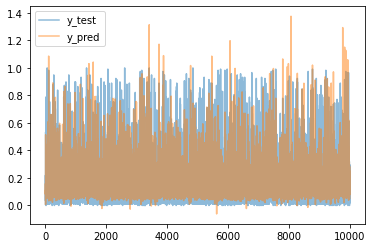

In [ ]:
y_test1 = y_test.reshape(1,100000)[0]
y_pred1 = y_pred.reshape(1,100000)[0]
comparisonLGB = pd.DataFrame({'y_test':y_test1[:10000], 'y_pred':y_pred1[:10000]})
comparisonLGB.plot(alpha=0.5)

Since we have preprocessed the features to reduce the multicollinearity of the features, the results of ridge regression are very similar to linear regression, which also proves the success of our feature preprocessing in disguise. But these two models both have less time consuming.

Next we use Decision Tree

In [ ]:
# Decision Tree 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))


0.7238311297552118
0.008572181844297616
0.09258607802632973
0.037091016949152546
0.9999993813540464
0.7238311297552118


through the train score and test score we can see that there is absoluly overfitting with this model, after analyzing the parameters of the Decision Tree, we find that max_depth is important with intuitive, so we use a function to plot that under different max_depth, how the train score and test score will perform. first we scale with a rough range.

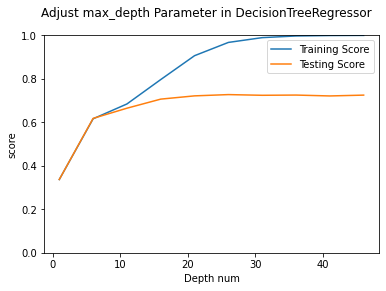

In [ ]:
def test_DecisionTreeRegressor_num_forDepth(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,50,5)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        des = DecisionTreeRegressor(max_depth=num)
        des.fit(X_train,y_train)
        training_scores.append(des.score(X_train,y_train))
        testing_scores.append(des.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("Depth num")
    ax.set_ylabel("score")
    ax.legend(loc="upper right")
    ax.set_ylim(0,1)
    plt.suptitle("Adjust max_depth Parameter in DecisionTreeRegressor")
    plt.show()

test_DecisionTreeRegressor_num_forDepth(X_train,X_test,y_train,y_test)

we can see that when the max_depth overs 10 the model is becoming overfitting.so we narrow down and find a more precise number.

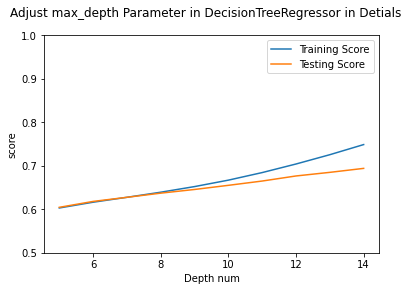

In [ ]:
def test_DecisionTreeRegressor_num_forDepth_detials(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(5,15)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        des = DecisionTreeRegressor(max_depth=num)
        des.fit(X_train,y_train)
        training_scores.append(des.score(X_train,y_train))
        testing_scores.append(des.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("Depth num")
    ax.set_ylabel("score")
    ax.legend(loc="upper right")
    ax.set_ylim(0.5,1)
    plt.suptitle("Adjust max_depth Parameter in DecisionTreeRegressor in Detials")
    plt.show()

test_DecisionTreeRegressor_num_forDepth_detials(X_train,X_test,y_train,y_test)

we can see that when max_depth is around 9, the model has good perforamce and it's not overfitting, so we train and test, and use hold_out set to get a score

In [ ]:
regressor = DecisionTreeRegressor(max_depth=9, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))
print(regressor.score(X_hold_out,y_hold_out))

0.645797819718194
0.010994307563814313
0.10485374368049198
0.05396414338285932
0.6522683813054487
0.645797819718194
0.6414336360999193


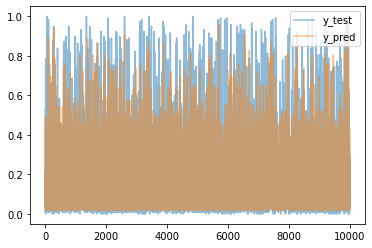

In [ ]:
y_test1 = y_test.reshape(1,100000)[0]
y_pred1 = y_pred.reshape(1,100000)[0]
comparisonLGB = pd.DataFrame({'y_test':y_test1[:10000], 'y_pred':y_pred1[:10000]})
comparisonLGB.plot(alpha=0.5)

Then we use Random Forest Regression

In [ ]:
#RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train,y_train.ravel())
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8693823829555599
0.004054323589698282
0.06367357057444072
0.027522855491323647
0.9813903719041348
0.8693823829555599


we can see that if we use default parameters the model takes really long time and it is overfitting so we analyze the random forest regression API to find the important parameters which has high effect on result, we find that max_depth which means the maximum depth of the tree.the other one is n_estimators,the number of trees in the forest. so we should tune these two parameters, we tried to use GridSearch CV to find the optimized parameter but it takes too long to find, so we just use functions to test each parameter.

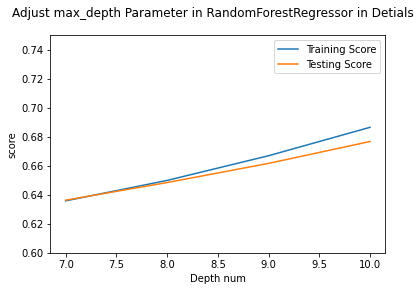

In [ ]:
def test_RandomForestRegressor_num_forDepth_detials(*data):
    X_train,X_test,y_train,y_test=data
    nums=[7,8,9,10]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        clf = RandomForestRegressor(max_depth=num)
        clf.fit(X_train,y_train.ravel())
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("Depth num")
    ax.set_ylabel("score")
    ax.legend(loc="upper right")
    ax.set_ylim(0.6,0.75)
    plt.suptitle("Adjust max_depth Parameter in RandomForestRegressor in Detials")
    plt.show()

test_RandomForestRegressor_num_forDepth_detials(X_train,X_test,y_train,y_test)

we can see when max_depth equals 9 two scores are high and it 's not overfitting, so we use this parameter to test n_estimator.

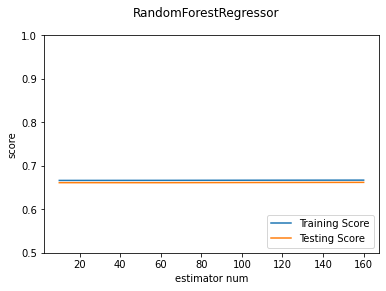

In [ ]:
def test_RandomForestRegressor_num(*data):
    X_train,X_test,y_train,y_test=data
    nums=np.arange(10,200,step=50)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr = RandomForestRegressor(max_depth=9,n_estimators=num)
        regr.fit(X_train,y_train.ravel())
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0.5,1)
    plt.suptitle("RandomForestRegressor")
    plt.show()
test_RandomForestRegressor_num(X_train,X_test,y_train,y_test) 

it really takes long time and we can see that when n_estimator changes, the score and trend don't have much change, so we can use the default value.

In [ ]:
clf = RandomForestRegressor(max_depth=9)
clf.fit(X_train,y_train.ravel())
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.score(X_hold_out,y_hold_out))

0.6622334964698819
0.01048415010209648
0.10239213886864793
0.05300146791572023
0.6672965242716102
0.6622334964698819
0.6560125978787656


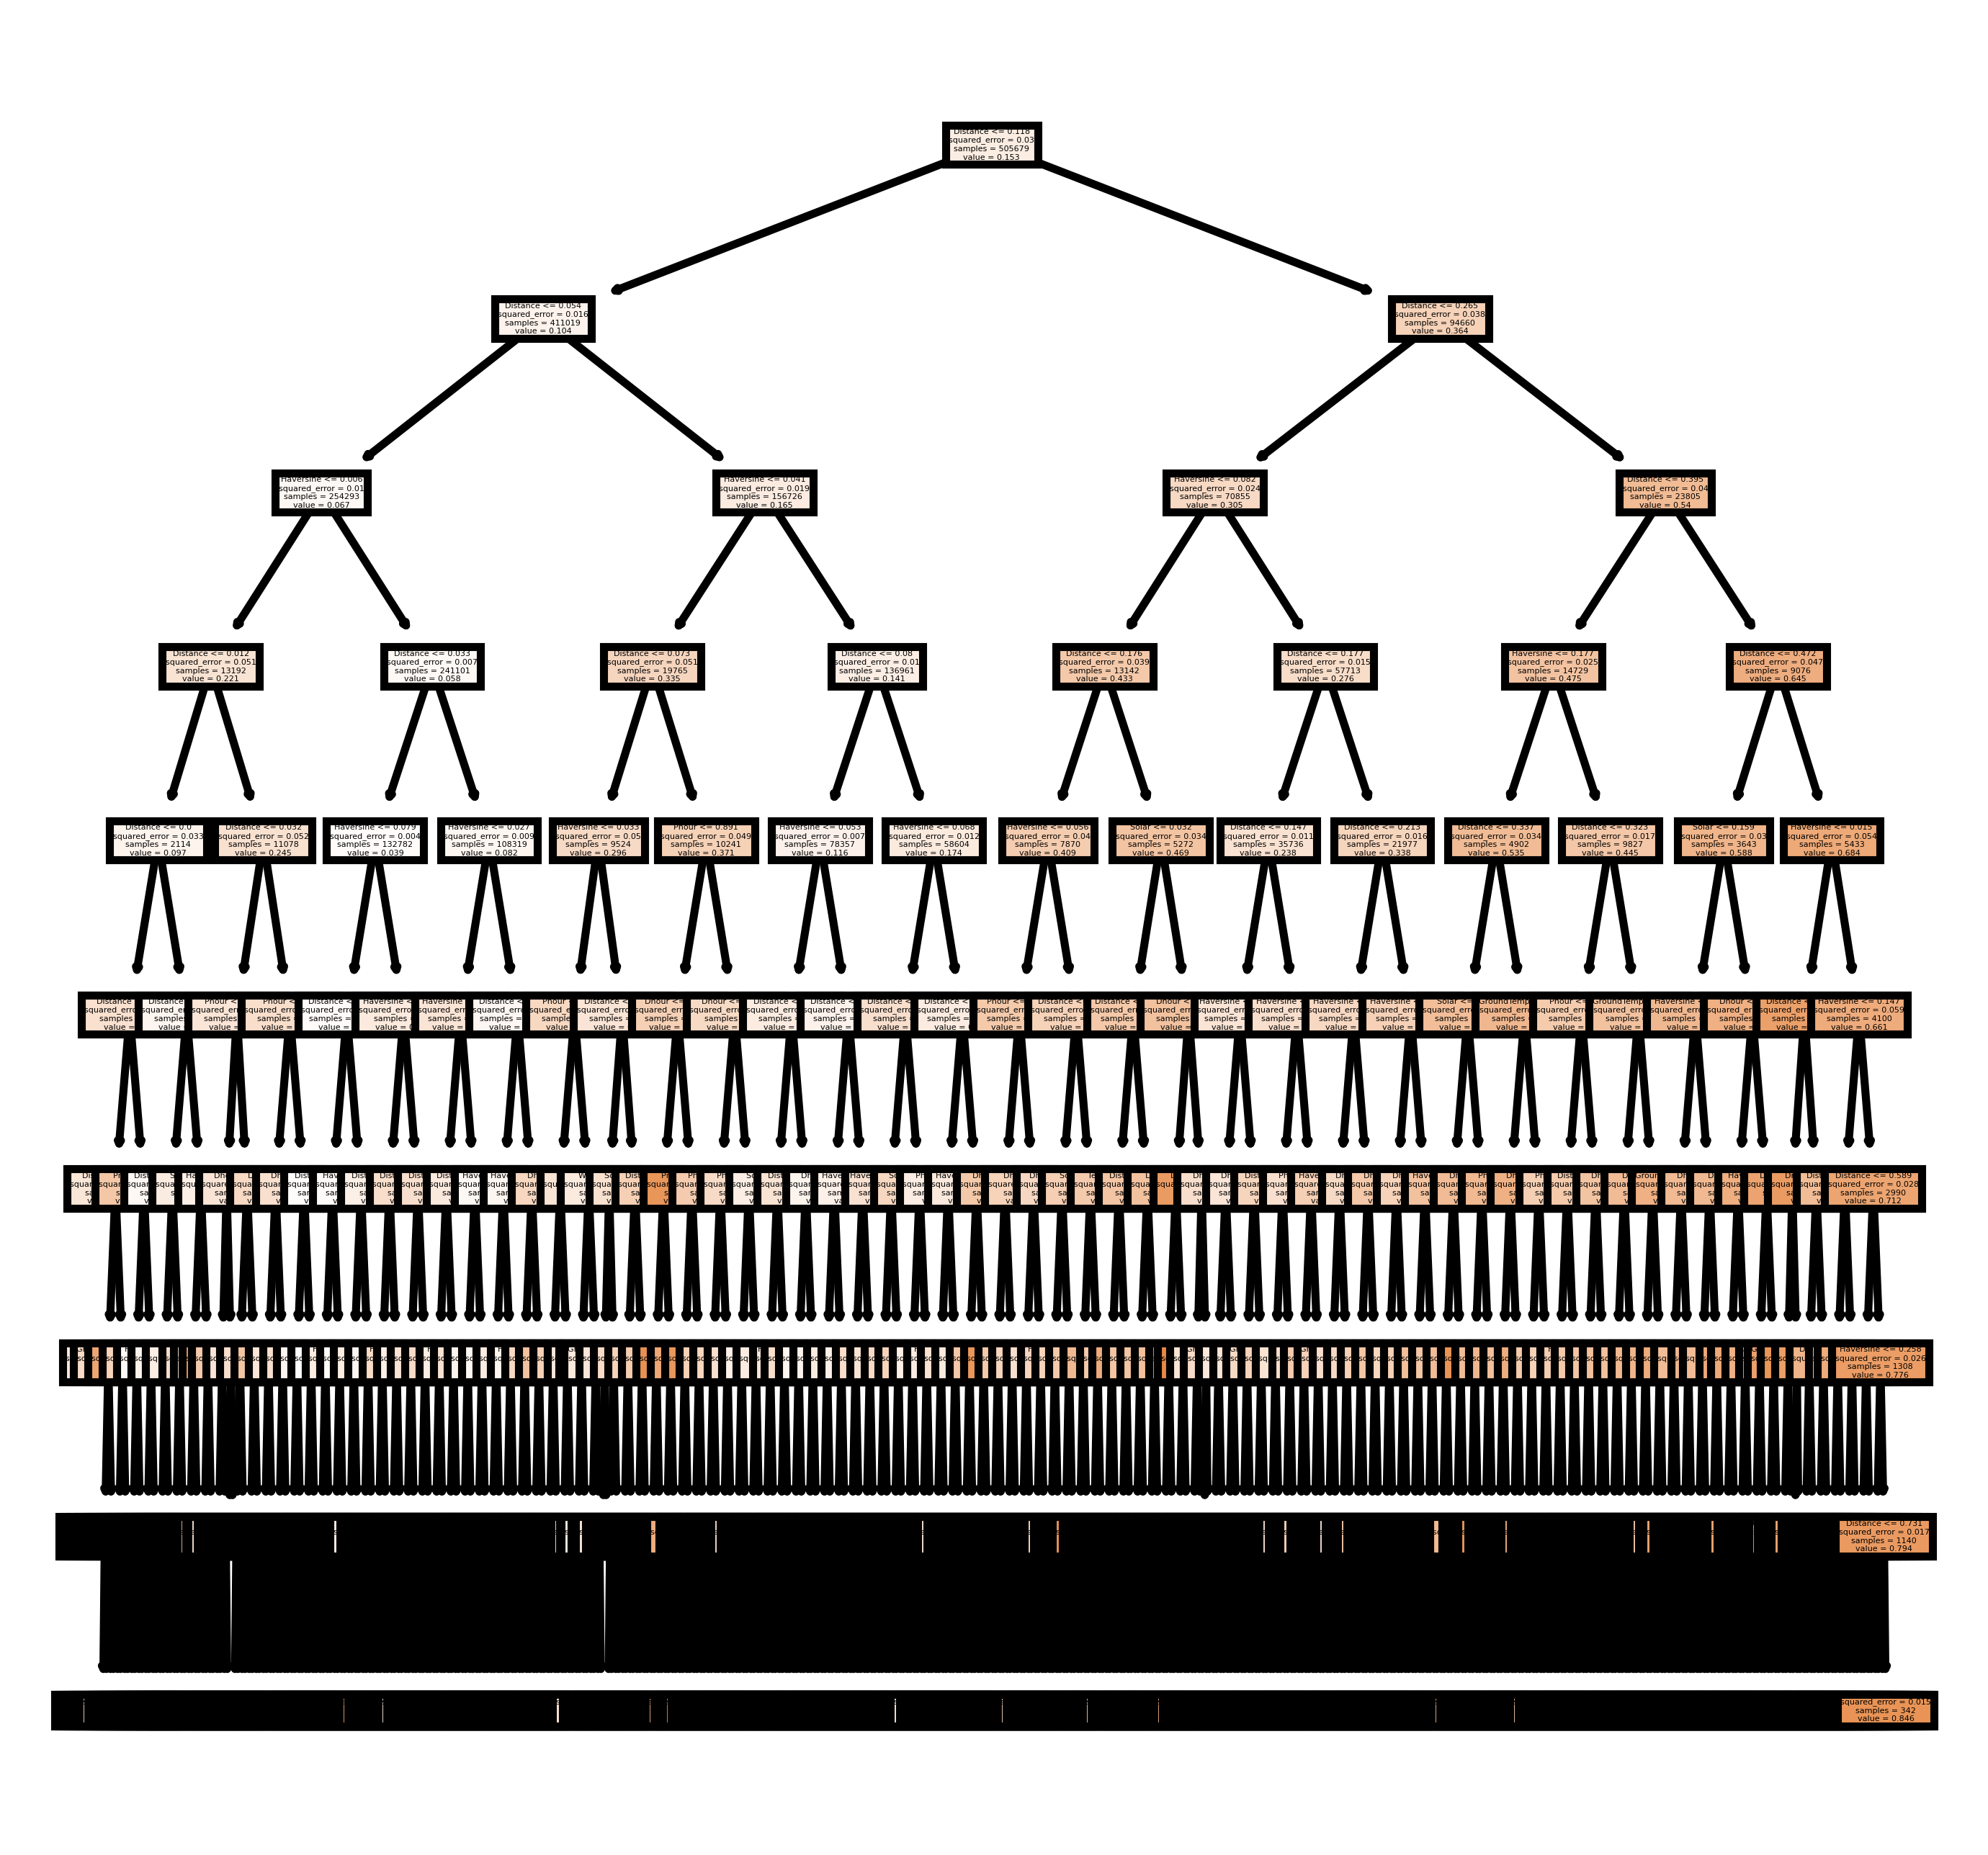

In [ ]:
from sklearn import tree
fn=df.columns[1:]
cn=df.columns[1:]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

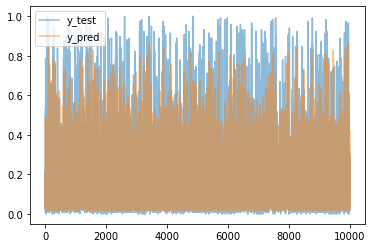

In [ ]:
y_test1 = y_test.reshape(1,100000)[0]
y_pred1 = y_pred.reshape(1,100000)[0]
comparisonLGB = pd.DataFrame({'y_test':y_test1[:10000], 'y_pred':y_pred1[:10000]})
comparisonLGB.plot(alpha=0.5)

[7.89818912e-01 1.64277304e-01 1.55619634e-02 1.34472797e-03
 3.06441935e-04 2.08656603e-02 1.45659415e-03 4.55158520e-04
 4.49421437e-04 4.95010326e-05 3.69263897e-04 5.13180803e-04
 2.89630508e-03 1.01678387e-04 1.02599826e-03 5.07888732e-04]


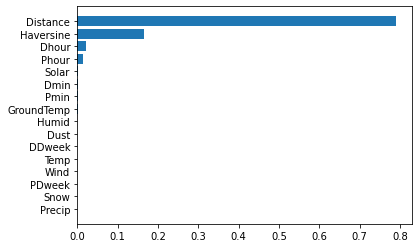

In [ ]:
importances = clf.feature_importances_
print(importances)
index = np.array(['Distance', 'Haversine', 'Phour', 'Pmin', 'PDweek', 'Dhour','Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow','GroundTemp', 'Dust'])
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(index[indices])

Finally we use LightGBM regressor model

In [ ]:
#LightGBM
lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train,y_train.ravel())
y_pred = lgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(lgb.score(X_train,y_train))
print(lgb.score(X_test,y_test))


0.8501889107056895
0.004650082026206837
0.06819150992760636
0.03766623032551123
0.8497985392914281
0.8501889107056895


we find that LightGBM is much faster than Random Forest and nearly as fast as Linear Regression. Then we find two parameters,since LigntGBM is leaf-wise,we just need to use num_leaves,the maximum tree leaves for base learners rather than use max_depth and they saitisfied the relationship that: num_leaves = 2^(max_depth).
the other one is n_estimators

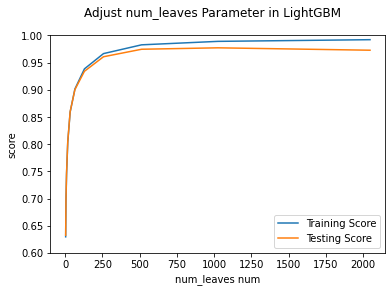

In [ ]:
def test_LightGBMRegressor_num_forLeaves(*data):
    X_train,X_test,y_train,y_test=data
    nums=[3,5,9,17,33,65,129,257,513,1025,2047]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        lgb = lightgbm.LGBMRegressor(num_leaves=num)
        lgb.fit(X_train,y_train.ravel())
        training_scores.append(lgb.score(X_train,y_train))
        testing_scores.append(lgb.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("num_leaves num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0.6,1)
    plt.suptitle("Adjust num_leaves Parameter in LightGBM")
    plt.show()
test_LightGBMRegressor_num_forLeaves(X_train,X_test,y_train,y_test)

 through the graph, we can see that when num_leaves around 500, the two scores are high and it's not overfitting. so we narrow down the range to (510,550)to find a more precise number.

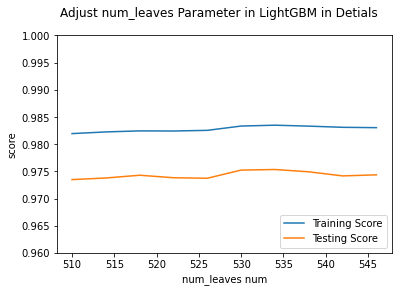

In [ ]:
def test_LightGBMRegressor_num_forLeaves_detials(*data):
    
    X_train,X_test,y_train,y_test=data
    nums=np.arange(510,550,step=4)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        lgb = lightgbm.LGBMRegressor(num_leaves=num)
        lgb.fit(X_train,y_train.ravel())
        training_scores.append(lgb.score(X_train,y_train))
        testing_scores.append(lgb.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("num_leaves num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0.96,1)
    plt.suptitle("Adjust num_leaves Parameter in LightGBM in Detials")
    plt.show()
    
test_LightGBMRegressor_num_forLeaves_detials(X_train,X_test,y_train,y_test)

we can see that when num_leaves equals 530, the model starts to perform overfitting.
then we test the when n_estimator changes how the model will perform.

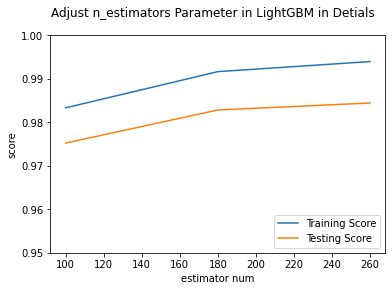

In [ ]:
def test_LightGBMRegressor_num_forEstimators_detials(*data):
    
    X_train,X_test,y_train,y_test=data
    nums=np.arange(100,300,80)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        lgb = lightgbm.LGBMRegressor(num_leaves=530, n_estimators=num)
        lgb.fit(X_train,y_train.ravel())
        training_scores.append(lgb.score(X_train,y_train))
        testing_scores.append(lgb.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0.95,1)
    plt.suptitle("Adjust n_estimators Parameter in LightGBM in Detials")
    plt.show()

test_LightGBMRegressor_num_forEstimators_detials(X_train,X_test,y_train,y_test)

we can see a clear turn when n_estimator equals 180, so we have the other parameter.
then we use num_leaves = 530 and n_estimators = 180 to train and test, use hold_out set to get the final score.

In [ ]:
#LightGBM
import lightgbm
# lgb = lightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=25, max_depth=5, learning_rate=0.1, n_estimators=100)
lgb = lightgbm.LGBMRegressor( num_leaves=530, n_estimators=180)
lgb.fit(X_train,y_train.ravel())
y_pred = lgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print(lgb.score(X_train,y_train))
print(lgb.score(X_test,y_test))
print(lgb.score(X_hold_out,y_hold_out))

0.9828409968133057
0.0005326092526389702
0.02307832863616796
0.010108673581458926
0.9916572048773233
0.9828409968133057
0.9828037007038015


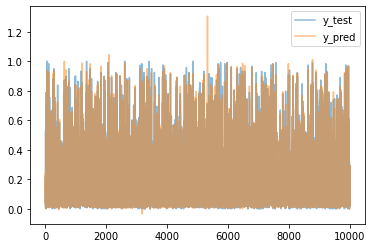

In [ ]:
y_test1 = y_test.reshape(1,100000)[0]
y_pred1 = y_pred.reshape(1,100000)[0]
comparisonLGB = pd.DataFrame({'y_test':y_test1[:10000], 'y_pred':y_pred1[:10000]})
comparisonLGB.plot(alpha=0.5)

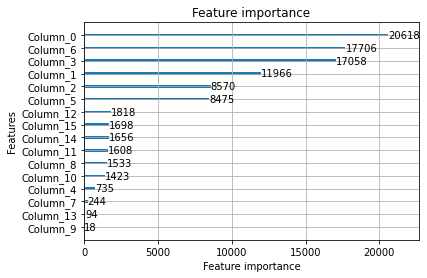

In [ ]:
lightgbm.plot_importance(lgb,xlabel='Feature importance', ylabel='Features')

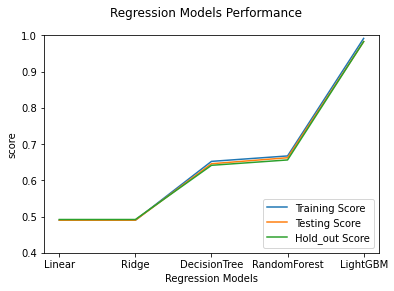

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
testing_scores=[0.4898845059312015, 0.489883602299092, 0.645797819718194, 0.6623536215064407, 0.9828409968133057]
training_scores=[0.4899509414849652, 0.48995090787553675, 0.6522683813054487, 0.6672762098512872, 0.9916572048773233]
holdout_scores=[0.49186645443359245,0.49186299419900015,0.6414336360999193,0.6562189866207917,0.9828037007038015]
nums=['Linear','Ridge','DecisionTree','RandomForest','LightGBM']
ax.plot(nums,training_scores,label="Training Score")
ax.plot(nums,testing_scores,label="Testing Score")
ax.plot(nums,holdout_scores,label="Hold_out Score")
ax.set_xlabel("Regression Models")
ax.set_ylabel("score")
ax.legend(loc="lower right")
ax.set_ylim(0.4,1)
plt.suptitle("Regression Models Performance")
plt.show()

we find that LightGBM has best performance on our prediction, the score is nearly 99 and it takes less time.